# Investigate TMDb Database

## Navigation
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#eda1">Has the rating changed from movies released in 1960s to movies released in 2010s?</a></li>
        <li><a href="#eda2">How much did movie production increase over time?</a></li>
        <li><a href="#eda3">Has movie runtime changed throughout the decades?</a></li>
        <li><a href="#eda4">Does the more votes a movie receive indicate a higher average rating?</a></li>
    </ol>
    <br>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set contains information from about 10,000 movies collected from The Movie Database (TMDb). Releases are included from the 1960 to 2015. Additional columns are were added to adjust revenue & budget based on 2010 prices.

In this analysis, I'll look to answer questions related to:
1. How movie ratings and releases have changed between the decades
2. The relationship between the number of votes and higher ratings

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('tmdb-movies.csv')

In [ ]:
# View initial dataframe datatypes and columns
df.info()

In [3]:
# View initial head
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# Check for Null Values
df.isnull().sum().any()

True

In [5]:
# Check for 0 Revenue Values and store in seperate dataframe
null_data = df[df.isnull().any(axis=1)]
null_data['revenue'].value_counts()

0            5470
12000000        9
10000000        8
6000000         6
11000000        6
             ... 
48919043        1
173398518       1
8106475         1
64088552        1
14665733        1
Name: revenue, Length: 3287, dtype: int64

In [6]:
# Check data and datatype of release_date column
df.release_date

0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
           ...   
10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, Length: 10866, dtype: object

### Cleaning - Remove Duplicates

In [7]:
# Check for duplicates
df_duplicates = df[df.duplicated(['id'], keep=False)]
df_duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Remove duplicates
df = df.drop_duplicates()

In [9]:
# Confirm 0 duplicates
df.duplicated().sum()

0

### Cleaning - Convert datatypes

In [10]:
# Print datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [11]:
# Convert Budget_adj to Int
df['budget_adj'] = df['budget_adj'].astype(int)
df['budget_adj']

0        137999939
1        137999939
2        101199955
3        183999919
4        174799923
           ...    
10861            0
10862            0
10863            0
10864            0
10865       127642
Name: budget_adj, Length: 10865, dtype: int32

In [12]:
# Convert Revenue_adj to int
df['revenue_adj'] = df['revenue_adj'].astype(int)
df['revenue_adj']

0        1392445892
1         348161292
2         271619025
3        1902723129
4        1385748801
            ...    
10861             0
10862             0
10863             0
10864             0
10865             0
Name: revenue_adj, Length: 10865, dtype: int32

In [13]:
# Change release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')


### Cleaning - Rename columns

In [14]:
# Rename 2010 budget and revenue columns
df.rename(columns={'budget_adj':'budget_2010','revenue_adj':'revenue_2010'}, inplace=True)

### Add additional columns Profit and Decade

In [15]:
# Calculate profit based on 2010 adjusted revenue/budget
df['profit'] = df['revenue_2010'] - df['budget_2010']
df['profit'] = df['profit'].astype(int)

In [16]:
# Bin years into decades
df['decades'] = pd.cut(x=df['release_year'], bins=[1960, 1969, 1979,1989,1999,2009,2015], labels=['1960s', '1970s', '1980s','1990s','2000s','2010s'])

In [17]:
# Confirm new columns
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,decades
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,2010s
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,210161353,2010s
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,170419070,2010s
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1718723210,2010s
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1210948878,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0,0,0,1960s
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0,0,0,1960s
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0,0,0,1960s
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0,0,0,1960s


### Create dataframes for financial analysis

In [18]:
# Query rows that have a revenue value more than 2 to avoid 0 datatypes
fdata = df.query('revenue_2010 != 0')

### Cleaning - Remove Data (Optional)

In [2]:
# Drop irrelevent columns if needed
# df.drop(['id','imdb_id','homepage', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='eda1'></a>
### Research Question 1 - Has the rating changed from movies released in 1960s to movies released in 2010s?

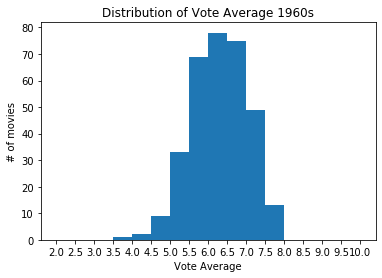

In [20]:
# Histogram to see vote_average distribution of 1960s
b = df.query('decades == "1960s"')
fig,ax = plt.subplots(1,1)
a = b['vote_average']
ax.hist(a, bins = [2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
ax.set_title("Distribution of Vote Average 1960s")
ax.set_xticks([2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
ax.set_xlabel('Vote Average')
ax.set_ylabel('# of movies')
plt.show()

* Highest volume of ratings for 1960s is 6.0-6.5. Most movies have a rating between 5.5-7.5. Data is slightly skewed left.

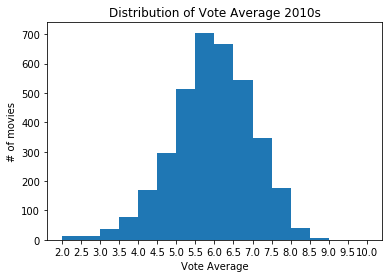

In [21]:
# Histogram to see vote_average distribution of the 2010s
b = df.query('decades == "2010s"')
fig,ax = plt.subplots(1,1)
a = b['vote_average']
ax.hist(a, bins = [2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
ax.set_title("Distribution of Vote Average 2010s")
ax.set_xticks([2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
ax.set_xlabel('Vote Average')
ax.set_ylabel('# of movies')
plt.show()

* Highest volume of ratings for 2010s is 5.5-6.0. Most movies received a rating of between 5.0-7.0. Data is slightly skewed left.

<a id='eda2'></a>
### Research Question 2 - How much did movie production increase over time?

In [22]:
# Movies released each year
df.groupby('release_year').count()['original_title']

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64

In [23]:
# Value counts of movie releases each decade
df['decades'].value_counts()

2010s    3605
2000s    3562
1990s    1765
1980s    1063
1970s     508
1960s     330
Name: decades, dtype: int64

In [24]:
# Create function to correctly calculate percent change for decades in sequential order
releases = [330,508,1063,1765,3562,3605]

for a, b in zip(releases[::1], releases[1::1]):
    print(100 * (b - a) / a)

53.93939393939394
109.25196850393701
66.03951081843839
101.81303116147309
1.2071869736103313


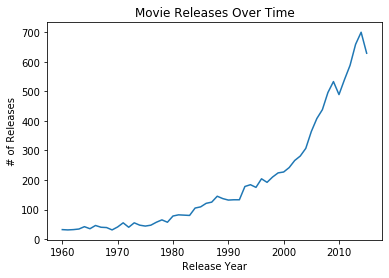

In [25]:
# Plot movie releases over time
plt.title('Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('# of Releases')
plt.plot(df.groupby('release_year').count()['original_title']);

* 330 movie releases in the 1960s to 3605 movie releases in the 2010s.
* The 1970s to the 1980s saw the biggest percentage increase of movie releases, with 109% increase decade/decade.
* Around the mid 90s, volume of movie releases increased significantly. Sharp upward trend starting around 2000 continuing to 2015 with only a slight dip in 2010.

<a id='eda3'></a>
### Research question 3 - Has movie runtime changed throughout the decades?

In [26]:
# Check average runtime by decade
df.groupby('decades').mean()['runtime']

decades
1960s    111.490909
1970s    107.799213
1980s    104.331138
1990s    106.619263
2000s    102.080573
2010s     97.424965
Name: runtime, dtype: float64

In [27]:
# Percent change each decade
df.groupby('decades').mean()['runtime'].pct_change().mean()*100

-2.6305729889087215

In [28]:
# Percent change 1960s > 2010s
a = pd.Series([111.49,97.42])
a.pct_change()*100

0          NaN
1   -12.619966
dtype: float64

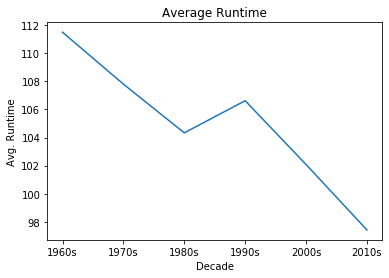

In [29]:
# Build line plot for average runtime
plt.title('Average Runtime')
plt.xlabel('Decade')
plt.ylabel('Avg. Runtime')
plt.plot(df.groupby('decades').mean()['runtime']);

* Average runtime in 1960s was 111 minutes. Average decline of 2.6% each decade. Average Runtime in 2010s is 97 minutes. This is a total decrease of 12.6% from 1960 - 2010s, about 14 minutes of runtime. 

<a id='eda4'></a>
### Research Question 4 - Does the more votes a movie receive indicate a higher average rating?

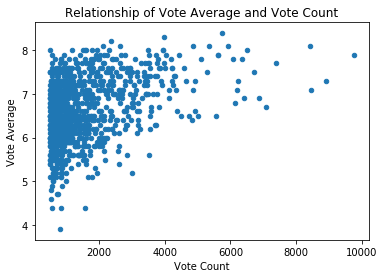

In [30]:
# Scatter plot for Vote Count and Vote Average with movies that have a minimum of 500 votes
a = df.query('vote_count >= 500')
a.plot(x='vote_count', y='vote_average', kind='scatter')
plt.title("Relationship of Vote Average and Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Vote Average");

* Positive correlation between View Count and Vote Average. Movies with the most votes also have the highest scores.
* All movies with more than 4000 votes have a rating of about 6.5 or higher.
* Most movies received under 2000 votes.

<a id='conclusions'></a>
## Conclusions

##### Of the movies analysed from the 1960s the highest amount of ratings is between 6.0-6.5. In the 2010s, the highest volume of ratings is at 5.5-6.0. The 2010s saw significantly more movies released which is provides much more data than the 1960s. The movies from the 1960s did not receive any ratings lower than 3.0, where the 2010s have ratings that go to the floor. In both decades, most movies range from a 5.5-6.5 average rating.

* *This dataset only includes votes from the TMDb website and does not always account for ratings around their release. Recent releases receive more votes possibly do to the amount of modern viewer's ability to vote online. The data includes 330 releases for the 1960s, where the 2010s includes 3605 releases.*


##### Movie production steadily increased from 1960 to 1990. In the mid to late 90s, movie production exploded and has continued to increase at a rapid rate with only a slight dip 2010. 

   ##### **2X** the number of movies were released in 2000s than in the 1990s. The most movies were released in 2014, with a count of 700.

##### Average movie runtime in the 1960s was 111 minutes, compared to 97 minutes in the 2010s. Decade over decade, average runtime decreased about 2.6%. In the past 60 years, total movie runtime has decreased by 12.6%. 

* *Though based on all movies in this dataset, it's likely more movies were released in each year. Noting this, I still believe this is an accurate representation of the overall trend of movie releases and their length over time.*

##### If we look at movies that received at least 500 votes, positive correlation can be seen between the number of votes and the vote average (rating). While there are many films that received 500 votes and have a large range of ratings, it can be seen by the chart above that the more votes a movie receives the higher the rating will be. All movies with more than 4000 votes have a rating of about 6.5 or higher. The top movies movies all received the highest number of votes.

* *Due to the volume of movies with under 2000 votes, rating data may be more accurate if additional sources are used, though I expect the relationship will remain unchanged. Positive correlation can be seen with no significant outliers.*